# Bayesian Inference

If $P(x|a) = N(a) a^{-x^2/2}$ then we need $N(a) = \sqrt{\ln(a)/(2\pi)}$ for normalization.

Bayes theorem states that $P(a|x) = \frac{P(x|a) P(a)}{P(x)}$

With $n$ samples, we get:
$P(a|\{x\}) = \frac{P(\{x\}|a) P(a)}{P(\{x\})}$
where:
$P(\{x\}|a) = N(a)^n a^{-1/2 \sum_i x_i^2}$

$P(\{x\}|a)$ is called the likelihood.

$P(a|\{x\})$ is called the posterior.

$P(a)$ is called the prior. Take to be uniform: Try $P(a) = 1$

Then: $P(a|\{x\}) = \frac{N(a)^n a^{\sum_i x_i^2/2}}{P(\{x\})}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def normfactor(a):
    """ For a given input 'a', returns the normalization constant in front of the corresponding Gaussian """
    return np.sqrt(np.log(a) / (2 * np.pi))

In [4]:
def gauss(x):
    """ For a given input 'x', returns P(x) which is the probability density function for Gaussian of mean 1 and std dev 1 """
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x ** 2))

In [5]:
np.random.seed(2)

In [6]:
samples = []
# Generate 100 samples:
for i in range(100):
    samples.append(np.random.normal())
exponent = -0.5 * np.sum(np.square(samples))

In [7]:
# Calculate the numerator in the expression for P(a|{x})

a_values = np.linspace(1, 5, 500)
like_values = []

for a in a_values:
    like_values.append((normfactor(a) ** 100) * (a ** exponent))


In [8]:
# Calculate the denominator in the expression for P(a|{x}), i.e. calculate P({x})

px = 1
for k in samples:
    px = px * gauss(k)
    
post_values = like_values / px

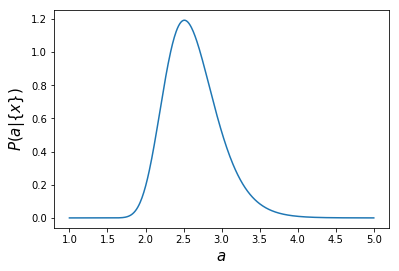

In [9]:
# Plot P(a|{x}) from the 100 samples

plt.plot(a_values, post_values)
plt.xlabel(r"$a$", fontsize=15)
plt.ylabel(r"$P(a|\{x\})$", fontsize=15)
plt.show()

In [10]:
# Create Markov Chain

# Pick random starting value of a (in the range -10 to 10)
a_init = (np.random.rand() * 20) + (-10)
# print(a_init)

# Set number of timesteps, deviation sigma in the generator,
# and enter the loop:
timesteps = 50000
sigma = 0.1

a_history = []
time_history = []

# Implement Metropolis-Hastings Algorithm
a_curr = a_init
for t in range(timesteps):
    a_cand = np.random.normal(a_curr, sigma)
    p_cand = (normfactor(a_cand) ** 100) * (a_cand ** exponent)
    p_curr = (normfactor(a_curr) ** 100) * (a_curr ** exponent)
    ratio = p_cand / p_curr
    acceptance = min(1, ratio)
    u = np.random.rand()
    if u <= acceptance:
        a_curr = a_cand

    a_history.append(a_curr)
    time_history.append(t)

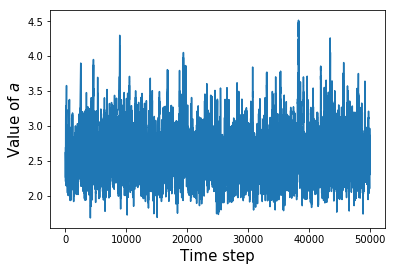

In [11]:
# Plot the 'trace plot'

plt.plot(time_history, a_history)
plt.xlabel("Time step", fontsize=15)
plt.ylabel("Value of $a$", fontsize=15)
plt.show()

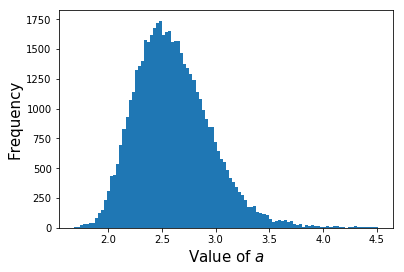

In [12]:
# Plot the histogram

num_bins = 100
plt.hist(a_history, num_bins)
plt.xlabel("Value of $a$", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()